#**Penguin Classification Analysis**

##Importing essential libraries beforehand

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##1. Download the dataset : https://www.kaggle.com/code/parulpandey/penguin-dataset-the-new-iris/data?select=penguins_size.csv


##2. Load the dataset

In [ ]:
df = pd.read_csv('penguins_size.csv')

In [ ]:
df.shape

(344, 7)

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##3. Perform below visualizations

###Univariate Analysis

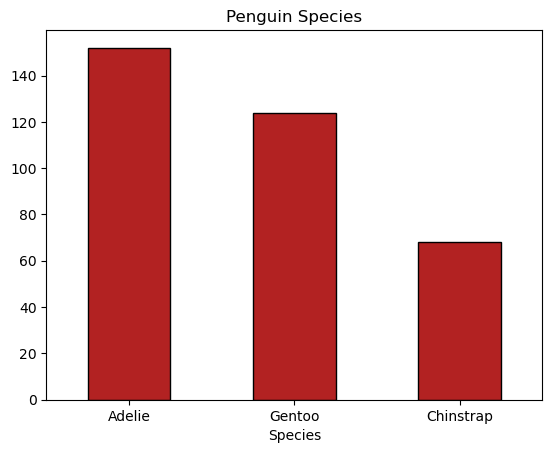

In [ ]:
df['species'].value_counts(normalize = False).plot(kind = 'bar', color = 'firebrick', linewidth = 1, edgecolor = 'k')
plt.title('Penguin Species')
plt.xlabel('Species')
plt.xticks(rotation = 360)
plt.show()

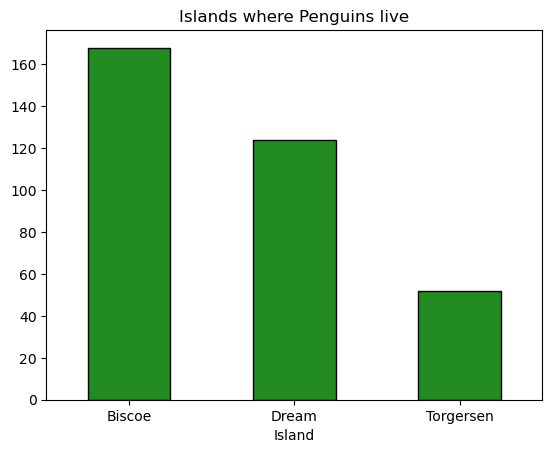

In [ ]:
df['island'].value_counts(normalize = False).plot(kind = 'bar', color = 'forestgreen', linewidth = 1, edgecolor = 'k')
plt.title('Islands where Penguins live')
plt.xlabel('Island')
plt.xticks(rotation = 360)
plt.show()

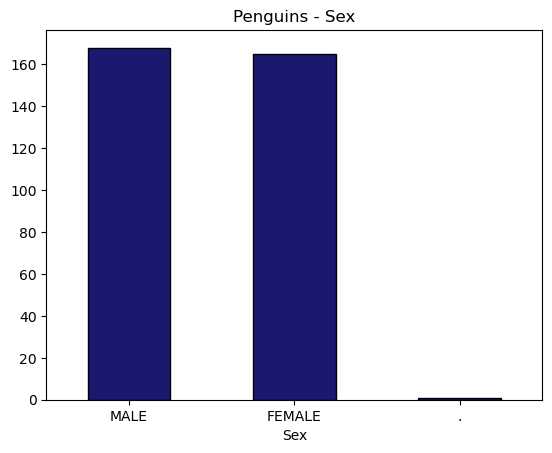

In [ ]:
df['sex'].value_counts(normalize = False).plot(kind = 'bar', color = 'midnightblue', linewidth = 1, edgecolor = 'k')
plt.title('Penguins - Sex')
plt.xlabel('Sex')
plt.xticks(rotation = 360)
plt.show()

###Bi-Variate Analysis

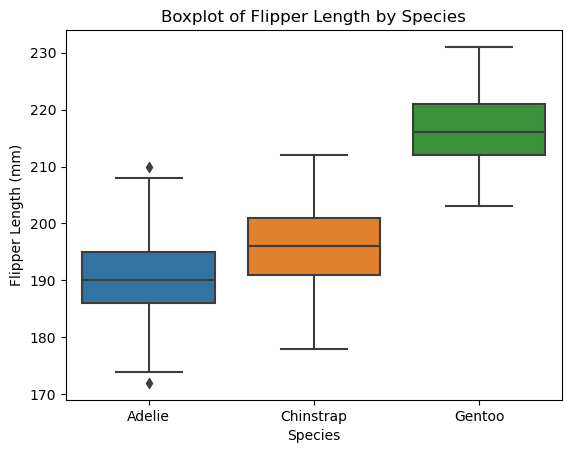

In [ ]:
sns.boxplot(x='species', y='flipper_length_mm', data=df)
plt.title('Boxplot of Flipper Length by Species')
plt.xlabel('Species')
plt.ylabel('Flipper Length (mm)')
plt.show()

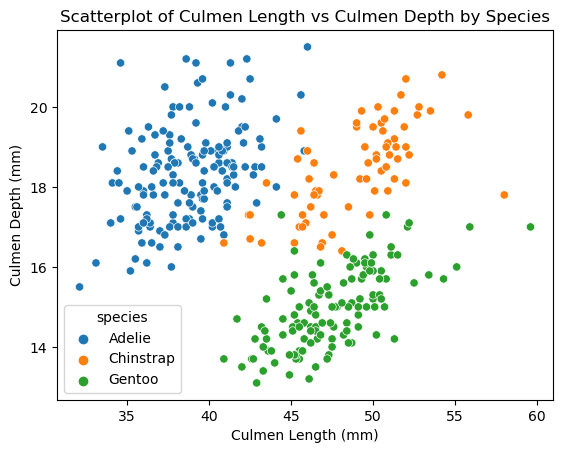

In [ ]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm', hue='species', data=df)
plt.title('Scatterplot of Culmen Length vs Culmen Depth by Species')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.show()

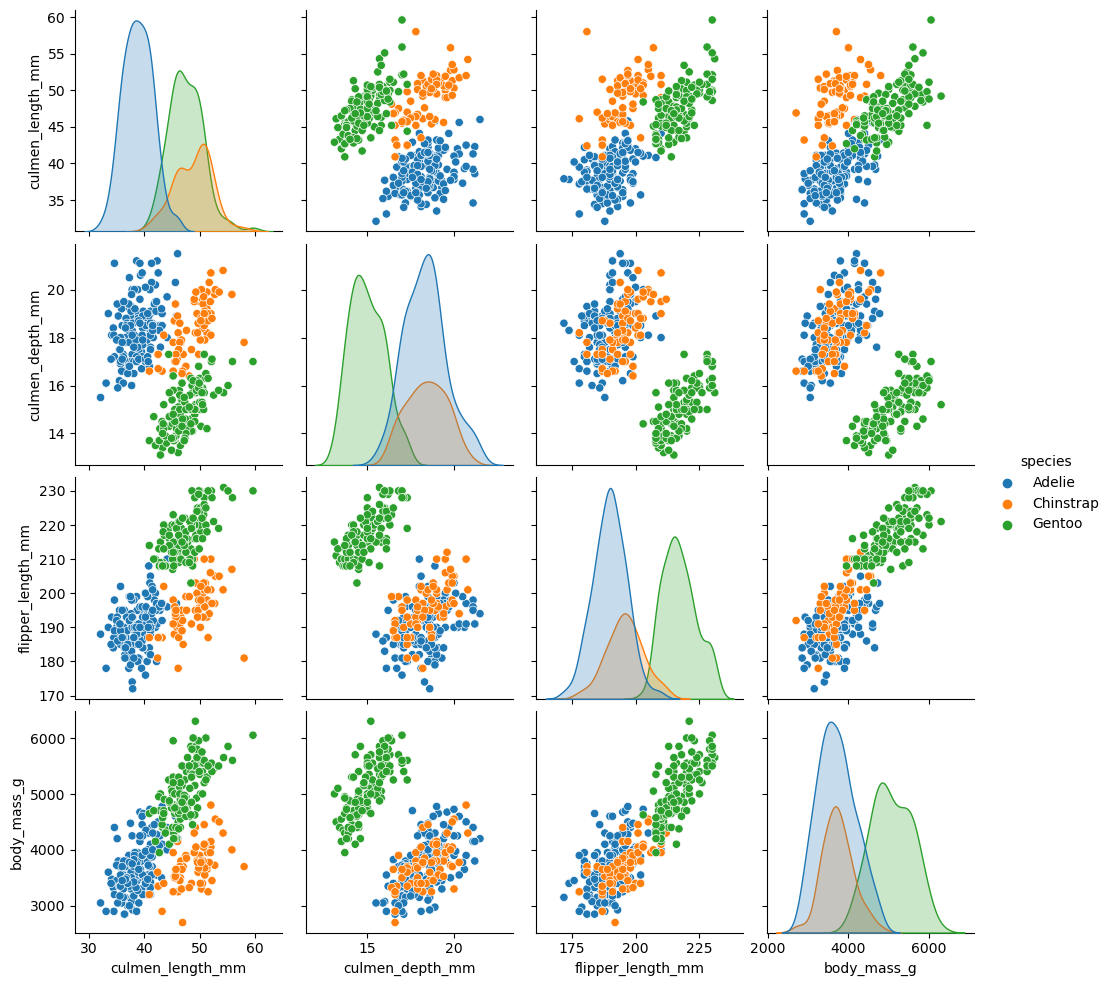

In [ ]:
# Pairplot to visualize the relationship between numeric variables
sns.pairplot(df, hue = 'species')
plt.show()

###Multi-Variate Analysis

In [ ]:
df_dummy = pd.get_dummies(df, columns = ['sex', 'island'], drop_first = True)

In [ ]:
df_dummy['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [ ]:
df_dummy['species'].replace({'Adelie' : 0,
                                'Chinstrap' : 1,
                                'Gentoo': 2}, inplace = True)

<Axes: >

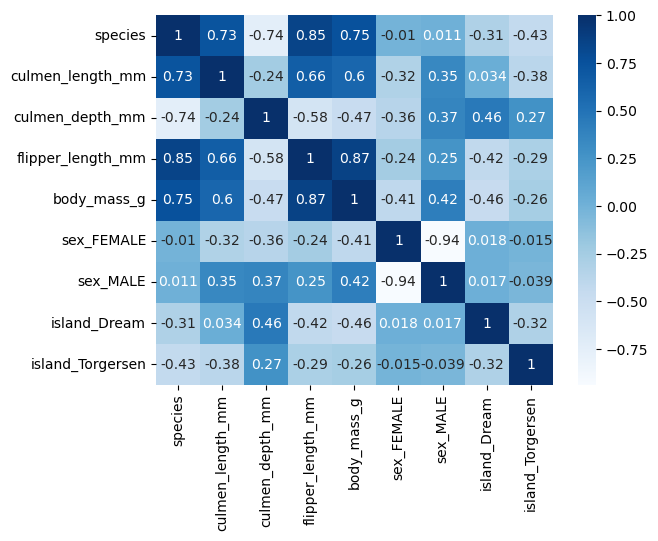

In [ ]:
sns.heatmap(df_dummy.corr(), annot = True, cmap = 'Blues')

##4. Perform descriptive statistics on the dataset

In [ ]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##5. Check for missing values and deal with them

In [ ]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df['culmen_length_mm'].fillna(np.mean(df['culmen_length_mm']), inplace = True)
df['culmen_depth_mm'].fillna(np.mean(df['culmen_depth_mm']), inplace = True)
df['flipper_length_mm'].fillna(np.mean(df['flipper_length_mm']), inplace = True)
df['body_mass_g'].fillna(np.mean(df['body_mass_g']), inplace = True)
df['sex'].fillna(df['sex'].mode()[0], inplace = True)

In [ ]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [ ]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

##6. Find the outliers and replace them outliers

Text(0, 0.5, 'body mass in grams')

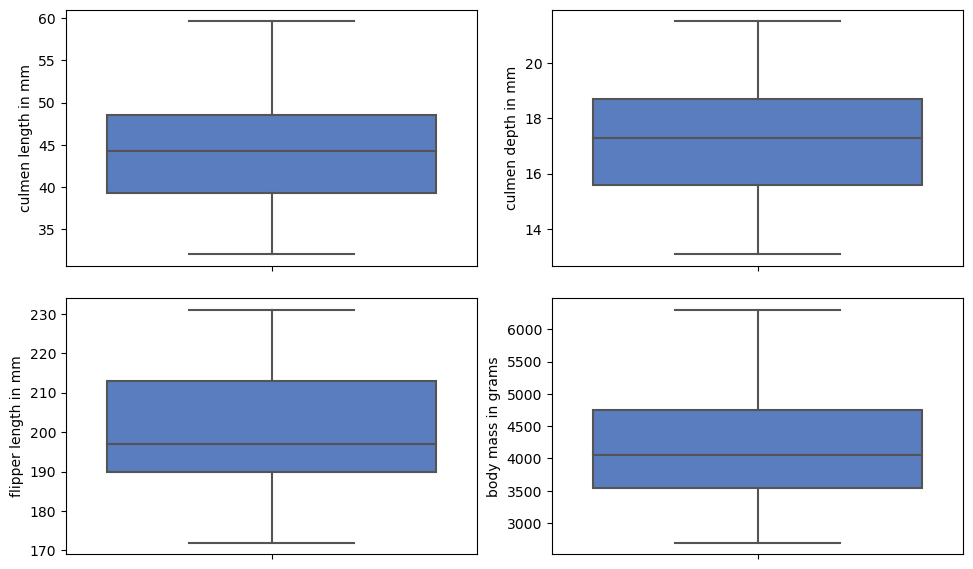

In [ ]:
sns.set_palette('muted')
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.boxplot(data=df,y='culmen_length_mm')
plt.ylabel("culmen length in mm")
plt.subplot(2,2,2)
sns.boxplot(data=df,y='culmen_depth_mm')
plt.ylabel("culmen depth in mm")
plt.tight_layout(pad=2.0)
plt.subplot(2,2,3)
sns.boxplot(data=df,y='flipper_length_mm')
plt.ylabel("flipper length in mm")
plt.subplot(2,2,4)
sns.boxplot(data=df,y='body_mass_g')
plt.ylabel("body mass in grams")

In [ ]:
#No outliers are present

##7. Check for categorical columns and perform encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df['species']=le.fit_transform(df['species'])
df['island']=le.fit_transform(df['island'])
df['sex']=le.fit_transform(df['sex'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    int32  
 1   island             344 non-null    int32  
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    int32  
dtypes: float64(4), int32(3)
memory usage: 14.9 KB


##8. Split the data into dependent and independent variables

In [ ]:
x=df.iloc[:,1:6]
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,2,39.10000,18.70000,181.000000,3750.000000
1,2,39.50000,17.40000,186.000000,3800.000000
2,2,40.30000,18.00000,195.000000,3250.000000
3,2,43.92193,17.15117,200.915205,4201.754386
4,2,36.70000,19.30000,193.000000,3450.000000


In [ ]:
y=df.iloc[:,:1]
y.head(5)

,species
0,0
1,0
2,0
3,0
4,0


##9. Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc=StandardScaler()

In [ ]:
x=sc.fit_transform(x)

In [ ]:
x

array([[ 1.84407623, -0.88708123,  0.78774251, -1.42248782, -0.56578921],
       [ 1.84407623, -0.81349399,  0.12655633, -1.06535169, -0.50316788],
       [ 1.84407623, -0.66631952,  0.43171918, -0.42250666, -1.19200251],
       ...,
       [-0.91402039,  1.1917582 , -0.73807176,  1.50602843,  1.93906399],
       [-0.91402039,  0.23512413, -1.19581604,  0.79175618,  1.25022936],
       [-0.91402039,  1.09977416, -0.53462985,  0.8631834 ,  1.50071468]])

##10. Split the data into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 30)

##11. Build the model

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
nb=GaussianNB()
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=30)

##12. Train the Model

In [ ]:
nb.fit(x_train,y_train)

GaussianNB()

In [ ]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=30)

##13. Test the Model

In [ ]:
pred1=nb.predict(x_test)
pred2=dt.predict(x_test)
pred3=rf.predict(x_test)

In [ ]:
print(pred1)
print(pred2)
print(pred3)

[1 1 2 0 0 2 2 1 0 0 2 0 2 0 0 1 0 2 0 2 1 2 2 2 0 0 2 0 0 1 2 2 1 1 0 0 2
 1 2 0 0 2 1 1 0 0 1 1 0 2 1 0 0 0 1 1 2 0 1 1 2 0 2 1 2 1 0 1 1 0 0 2 2 0
 1 0 2 1 1 1 0 2 2 0 1 0 1 2 0 0 2 2 2 1 2 0 2 0 2 2 1 0 2 0]
[1 1 2 0 0 2 2 1 0 0 2 0 2 0 0 0 1 2 0 2 1 0 2 2 0 0 2 0 0 0 2 2 1 1 0 0 2
 1 2 0 0 2 0 0 0 0 0 1 0 2 1 0 0 1 0 1 2 0 0 1 2 0 2 0 2 1 0 0 1 0 0 2 2 0
 1 0 2 0 0 0 0 0 2 0 1 0 1 2 0 0 2 2 2 0 2 0 2 0 2 2 1 0 2 0]
[1 1 2 0 0 2 2 1 0 0 2 0 2 0 0 0 0 2 0 2 1 0 2 2 0 0 2 0 0 0 2 2 1 1 0 0 2
 1 2 0 0 2 0 1 0 0 0 1 0 2 1 0 0 0 0 1 2 0 0 1 2 0 2 0 2 1 0 0 1 0 0 2 2 0
 1 0 2 0 0 0 0 0 2 0 1 0 1 2 0 0 2 2 2 0 2 0 2 0 2 2 1 0 2 0]


##14. Measure the performance using evaluation metrics

In [ ]:
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,classification_report

In [ ]:
print(f"for Naive Bayes Classifier \naccuracy score={accuracy_score(y_test,pred1)} \nR2_score={r2_score(y_test,pred1)}")
print(f"\nfor DecisionTree Classifier \naccuracy score={accuracy_score(y_test,pred2)} \nR2_score={r2_score(y_test,pred2)}")
print(f"\nfor RandomForest Classifier model \naccuracy score={accuracy_score(y_test,pred3)} \nR2_score={r2_score(y_test,pred3)}")

for Naive Bayes Classifier 
accuracy score=0.8846153846153846 
R2_score=0.8175651970529763

for DecisionTree Classifier 
accuracy score=0.9519230769230769 
R2_score=0.902701438428254

for RandomForest Classifier model 
accuracy score=0.9807692307692307 
R2_score=0.9391883990176587
